# Digit Recognizer

Reference: 
- https://pythondata.com/comparing-machine-learning-methods/
- http://yann.lecun.com/exdb/mnist/ (accuracy of various models on the dataset)



In [14]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd

# Importing libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Importing library for time manipulation
from datetime import datetime

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# Importing librararies for data pre-processing
from sklearn.model_selection import train_test_split

# Importing libraries for machine learning (without neural network)
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# Importing libraries for deep learning (CNN)
# from keras.models import Sequential
# from keras.layers import Dense, Activation

# Importing libraries for evaluation
from sklearn import metrics


In [15]:
FILEPATH_train = 'C:\\Users\\sameer.rai\\Desktop\\Jupyter Notebooks\\Digit Recognizer\\Data\\train.csv'
FILEPATH_test = 'C:\\Users\\sameer.rai\\Desktop\\Jupyter Notebooks\\Digit Recognizer\\Data\\test.csv'

In [16]:
train_data = pd.read_csv(FILEPATH_train)

In [17]:
train_data.shape

(42000, 785)

In [18]:
# Extracting features and labels
X = train_data.iloc[:, 1:].values
y = train_data.iloc[:, 0].values

In [19]:
# Reshaping the array for plotting
X_reshaped = np.reshape(X, (42000,28,28))

#### Data understanding

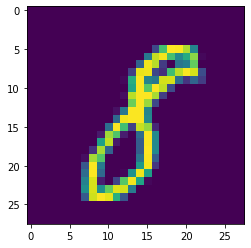

In [20]:
# Plotting sample inputs
plt.imshow(X_reshaped[5000])
plt.show()

In [21]:
# Dividing the dataset into training and cv set using pandas
# train_set = train_data.sample(frac = 0.2, random_state = 0.0)
# cv_set = train_data.drop(train_set.index)


### Data preparation for modelling

In [22]:
# Extracting features and lables for traning dataset
X = train_data.iloc[:, 1:].values
y = train_data.iloc[:, 0].values

# Dividing the dataset into training and cv set using much better method, sklearn train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 10)

# Scaling X_train and X_cv
X_train = X_train/255
X_test = X_test/255

### Modelling

In [23]:
models = {
    'Logistic Regression': LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial'),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector' : SVC(gamma='scale'),
    'Linear Discriminator' : LinearDiscriminantAnalysis(),
    'Gaussian NB' : GaussianNB(),
    'K-neighbours': KNeighborsClassifier()
}

Evaulation_result = {}
time = {}

# Iterating through all the models and using sklearn.model_selection.cross_val_score
for name, model in models.items():
    start_time = datetime.now()
    results = model_selection.cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5, scoring = 'accuracy' )
    end_time = datetime.now()
    time_taken = end_time - start_time
    time.update({name:time_taken})
    Evaulation_result.update({name : results})
    print(Evaulation_result)
    print(time)
    
# print(Evaulation_result)

evaluation_result = pd.DataFrame.from_dict(Evaulation_result, orient='index')
Time = pd.DataFrame.from_dict(time, orient='index')
print(evaluation_result)
print(Time)



{'Logistic Regression': array([0.91762082, 0.91922047, 0.9130823 , 0.91528956, 0.91439631])}
{'Logistic Regression': datetime.timedelta(seconds=176, microseconds=382536)}
{'Logistic Regression': array([0.91762082, 0.91922047, 0.9130823 , 0.91528956, 0.91439631]), 'Random Forest': array([0.93457249, 0.93722107, 0.93183509, 0.93121929, 0.92943278])}
{'Logistic Regression': datetime.timedelta(seconds=176, microseconds=382536), 'Random Forest': datetime.timedelta(seconds=9, microseconds=472137)}
{'Logistic Regression': array([0.91762082, 0.91922047, 0.9130823 , 0.91528956, 0.91439631]), 'Random Forest': array([0.93457249, 0.93722107, 0.93183509, 0.93121929, 0.92943278]), 'Support Vector': array([0.9729368 , 0.97426361, 0.97380563, 0.97156469, 0.97067143])}
{'Logistic Regression': datetime.timedelta(seconds=176, microseconds=382536), 'Random Forest': datetime.timedelta(seconds=9, microseconds=472137), 'Support Vector': datetime.timedelta(seconds=890, microseconds=981092)}
{'Logistic Regress

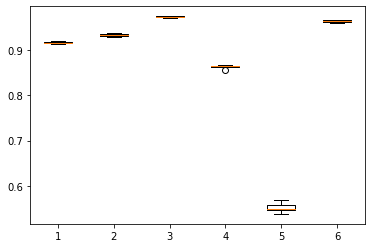

In [24]:
plt.boxplot(evaluation_result)
plt.show()

### <font color='Blue'>Next steps ??<font>
    - May be, Grid Search
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

### Traditional Machine learning models

#### K-nearest neighbour

In [25]:
'''
knn_obj = KNeighborsClassifier(n_neighbors = 10)
knn_obj.fit(X = X_train, y = y_train)
'''

'\nknn_obj = KNeighborsClassifier(n_neighbors = 10)\nknn_obj.fit(X = X_train, y = y_train)\n'

In [26]:
'''
y_train_pred_knn = knn_obj.predict(X_train)
y_test_pred_knn = knn_obj.predict(X_test)

print("Accuracy on training set for knn model: {}.".format(metrics.accuracy_score(y_train, y_train_pred_knn)))
print("Accuracy on test set for knn model: {}.".format(metrics.accuracy_score(y_test, y_test_pred_knn)))

'''

'\ny_train_pred_knn = knn_obj.predict(X_train)\ny_test_pred_knn = knn_obj.predict(X_test)\n\nprint("Accuracy on training set for knn model: {}.".format(metrics.accuracy_score(y_train, y_train_pred_knn)))\nprint("Accuracy on test set for knn model: {}.".format(metrics.accuracy_score(y_test, y_test_pred_knn)))\n\n'

#### Logistic regression

In [27]:
lr_obj = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial')
lr_obj.fit(X = X_train, y = y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = lr_obj.predict(X_train)

In [29]:
metrics.confusion_matrix(y_train, y_pred)


array([[3281,    0,    5,    3,    4,   12,   13,    3,   13,    2],
       [   0, 3672,    8,   12,    0,    9,    4,    5,   22,    6],
       [   9,   17, 3087,   40,   27,   14,   22,   32,   57,   16],
       [   3,   10,   57, 3226,    1,   95,    8,   19,   51,   25],
       [   2,   14,   11,    2, 3086,    2,   22,    7,   16,   84],
       [  26,   10,   22,   90,   29, 2735,   34,    6,   53,   17],
       [  18,    5,   13,    0,   11,   26, 3266,    0,   10,    1],
       [   1,   11,   29,   10,   14,    3,    2, 3366,    6,   90],
       [  14,   42,   17,   74,    8,   60,    9,    7, 2962,   34],
       [  10,   13,    7,   34,   60,   18,    0,   76,   17, 3098]],
      dtype=int64)

In [30]:
y_train_pred_lr = lr_obj.predict(X_train)
y_test_pred_lr = lr_obj.predict(X_test)

print("Accuracy on training set for lr model: {}.".format(metrics.accuracy_score(y_train, y_train_pred_lr)))
print("Accuracy on test set for lr model: {}.".format(metrics.accuracy_score(y_test, y_test_pred_lr)))

Accuracy on training set for lr model: 0.9458035714285714.
Accuracy on test set for lr model: 0.9186904761904762.


#### Support vector

In [31]:
# Creating object and fitting training dataset
svc_obj = SVC(gamma='scale')
svc_obj.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
# Evaluation of SVC: Accuracy and confusion matrix 
# y_pred_svc = svc_obj.predict(X_train)

y_train_pred_svc = svc_obj.predict(X_train)
y_test_pred_svc = svc_obj.predict(X_test)

print(metrics.confusion_matrix(y_train, y_train_pred_svc))

print("Accuracy on training set for SVC model: {}.".format(metrics.accuracy_score(y_train, y_train_pred_svc)))
print("Accuracy on test set for SVC model: {}.".format(metrics.accuracy_score(y_test, y_test_pred_svc)))

[[3324    0    1    1    2    1    3    0    3    1]
 [   0 3719    7    4    1    1    0    2    2    2]
 [   2    1 3294    5    5    0    0    7    5    2]
 [   0    1   13 3430    0   19    1    9   11   11]
 [   2    5    0    0 3206    0    3    3    0   27]
 [   4    2    1   15    3 2983    8    1    2    3]
 [   4    0    1    0    2    5 3334    0    4    0]
 [   2   14    7    3    8    0    0 3479    0   19]
 [   1    8    7    7    4    3    1    4 3190    2]
 [   7    4    1   11   24    2    1   21    4 3258]]
Accuracy on training set for SVC model: 0.9886011904761904.
Accuracy on test set for SVC model: 0.9757142857142858.


In [33]:
# Evaluation of SVC: Classification report
print(metrics.classification_report(y_train, y_train_pred_svc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3336
           1       0.99      0.99      0.99      3738
           2       0.99      0.99      0.99      3321
           3       0.99      0.98      0.98      3495
           4       0.98      0.99      0.99      3246
           5       0.99      0.99      0.99      3022
           6       0.99      1.00      1.00      3350
           7       0.99      0.98      0.99      3532
           8       0.99      0.99      0.99      3227
           9       0.98      0.98      0.98      3333

    accuracy                           0.99     33600
   macro avg       0.99      0.99      0.99     33600
weighted avg       0.99      0.99      0.99     33600

